# Diabetes Prediction

In [55]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Importing required Libraries for processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
data = pd.read_csv('/content/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
data.shape

(768, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From above **EDA** we can see for all the columns there is **no null** data for any of the 768 rows. We can observe for all columns in the dataset the **minimum value is 0**, which is not possible, we need to **replace** them with **mean/median** values in making the dataset reliable.

# Data Cleaning

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# Dropping all the duplicates in the dataset
data = data.drop_duplicates()
data.shape

(768, 9)

It looks there are **no duplicate rows** in the dataset, so we end up with the same size of the dataset

**Checking no of rows for each column in the dataset has value of zero**

In [11]:
print(data[data['BloodPressure']==0].shape[0])
print(data[data['Glucose']==0].shape[0])
print(data[data['SkinThickness']==0].shape[0])
print(data[data['Insulin']==0].shape[0])
print(data[data['BMI']==0].shape[0])

35
5
227
374
11


**Looking over outliers**

<Axes: >

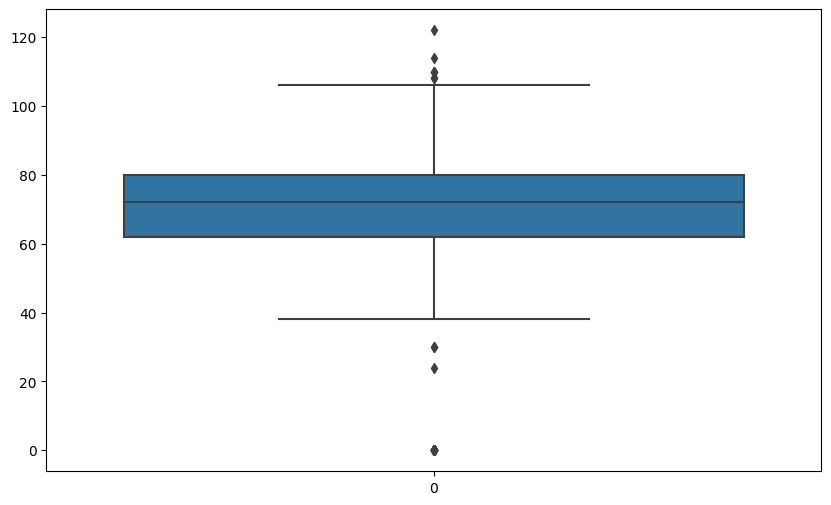

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data.BloodPressure)

<Axes: >

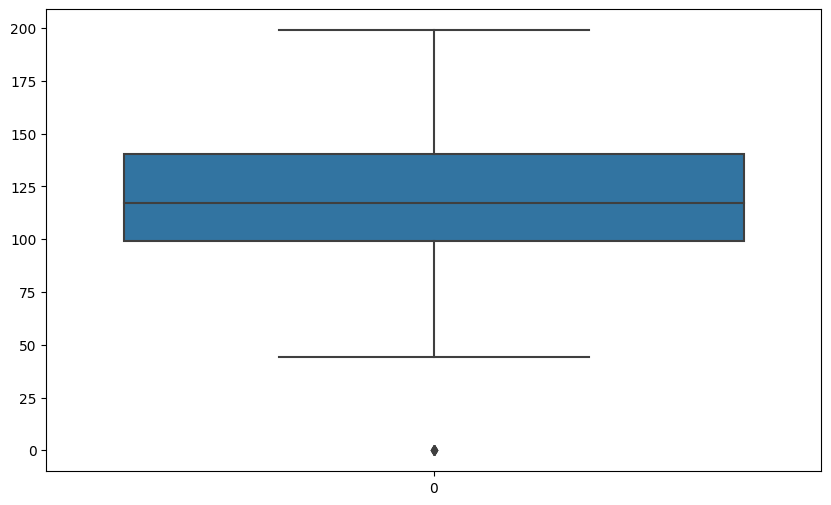

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data.Glucose)

<Axes: >

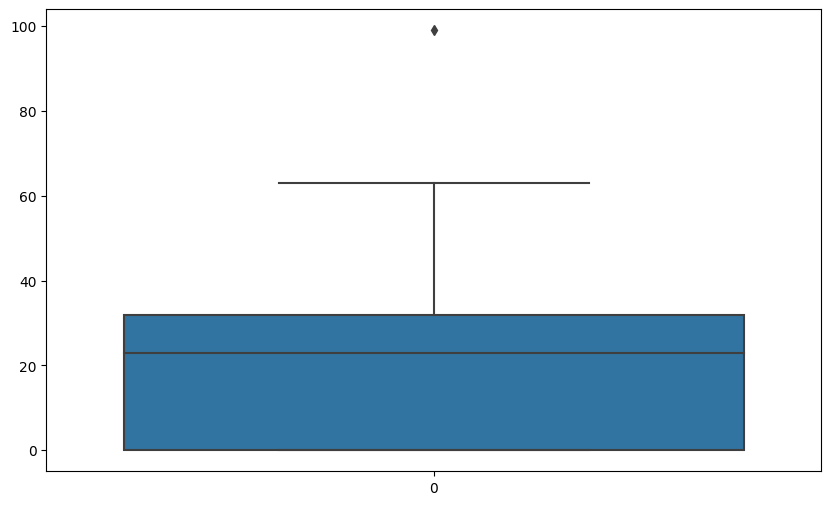

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data.SkinThickness)

<Axes: >

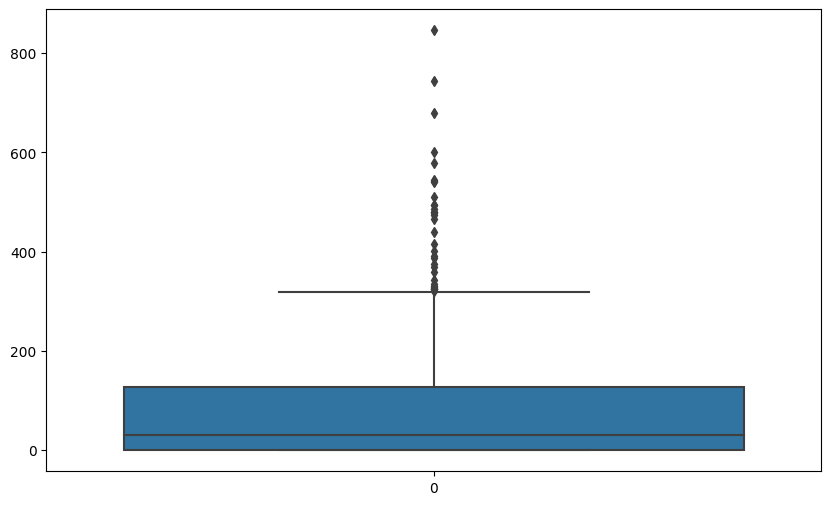

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data.Insulin)

<Axes: >

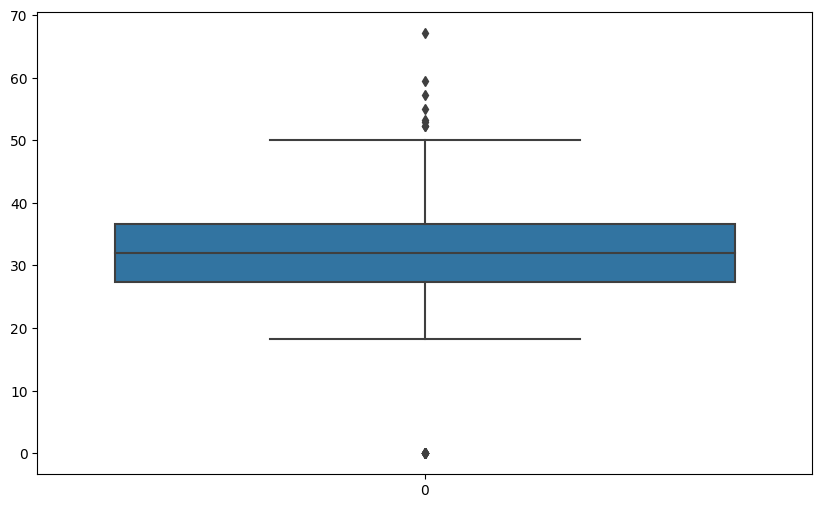

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data.BMI)

From the boxplots it is clear we have **outliers**, now we need to perform imputation to remove all outliers, we can use **mean,medina or mode imputaion in replacing the value zero.**
As **mean is more affected by skewed distribution**, for columns we can observe skew distribution **(SkinThickness, BMI, Inusulin) we can perform median imputation** and for columns **Glucose and BloodPressure** showing normal distributions we can perform **mean imputation.**

In [17]:
#replacing value zero
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())#normal distribution
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())#normal distribution
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median())#skewed distribution
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())#skewed distribution
data['BMI']=data['BMI'].replace(0,data['BMI'].median())#skewed distribution

# Data Visualization

**correlation of all the columns**

<Axes: >

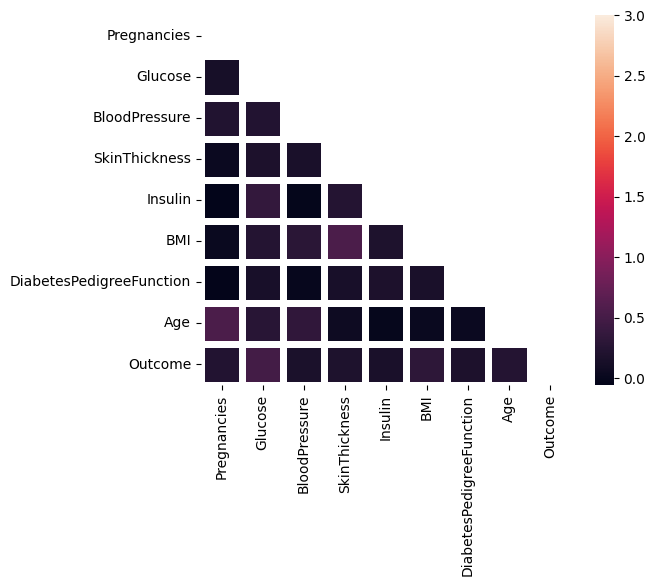

In [19]:
mask = np.triu(np.ones_like(data.corr(),dtype=bool))
sns.heatmap(data.corr(),mask=mask,vmax=3,square=True,linewidths=5)

<Axes: >

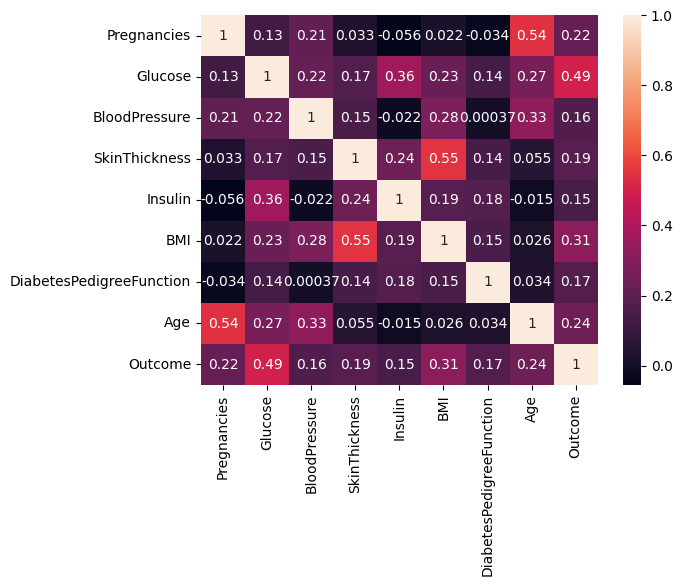

In [20]:
sns.heatmap(data.corr(), annot=True)

From correlation we can observe that outcome is more dependable on **Glucose, BMI and Age** than remaining columns. So removing those columns

In [21]:
newdata=data.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

In [22]:
newdata.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,6,148.0,35,33.6,50,1
1,1,85.0,29,26.6,31,0
2,8,183.0,23,23.3,32,1
3,1,89.0,23,28.1,21,0
4,0,137.0,35,43.1,33,1


# Handling Outliers

We know we have outliers in our dataset, Handling outlier is most important thing for good predictions.

In [23]:
from sklearn.preprocessing import QuantileTransformer
x=newdata
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
finaldata=quantile.transform(X)
finaldata=pd.DataFrame(X)
finaldata.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
finaldata.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


<Axes: >

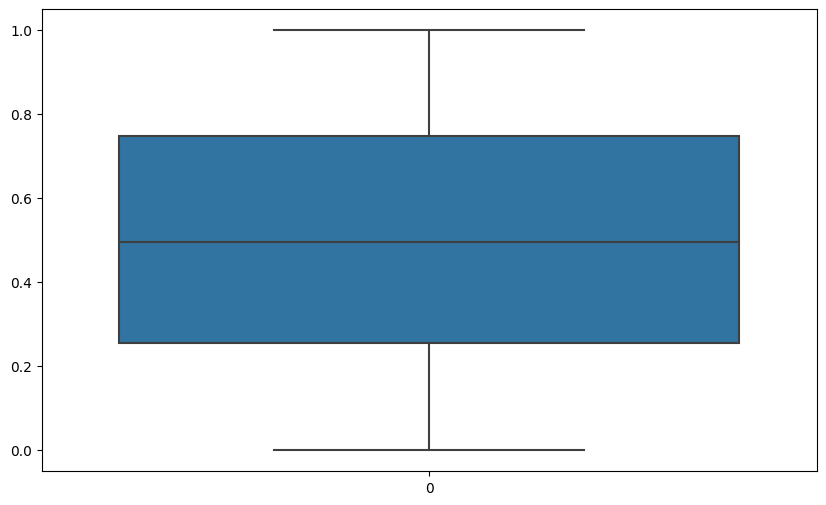

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(finaldata.Glucose)

<Axes: >

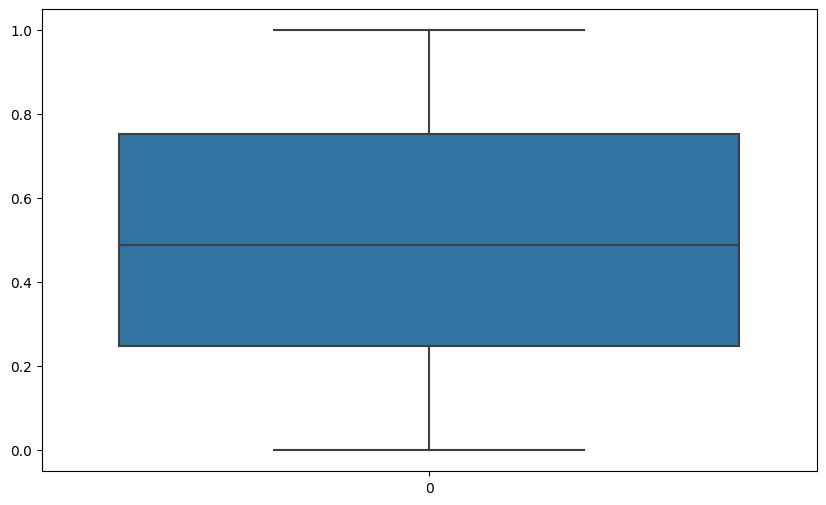

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(finaldata.BMI)

<Axes: >

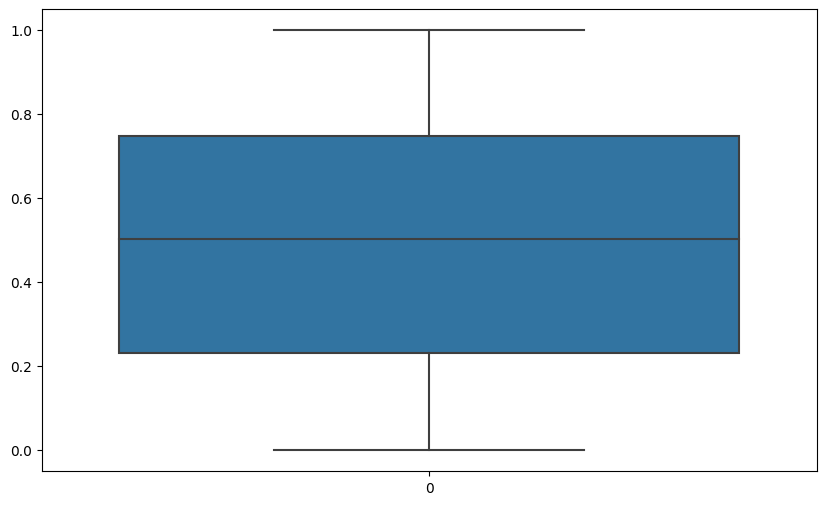

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(finaldata.Pregnancies)

<Axes: >

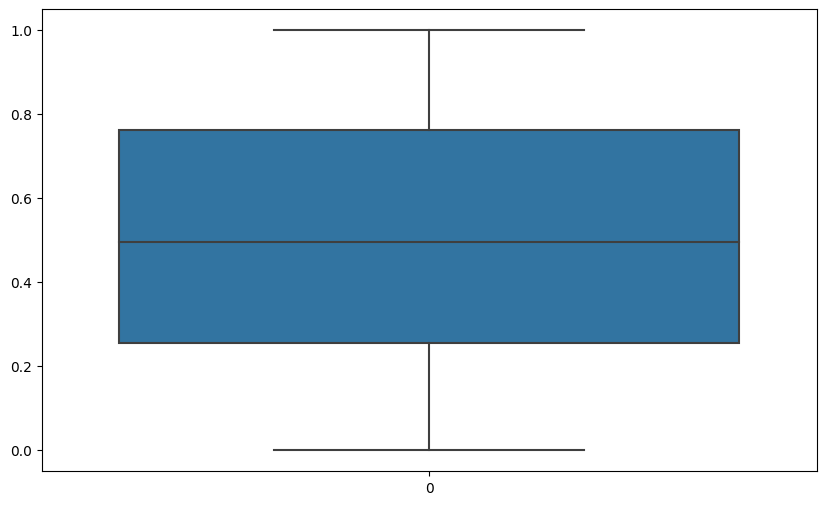

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(finaldata.Age)

<Axes: >

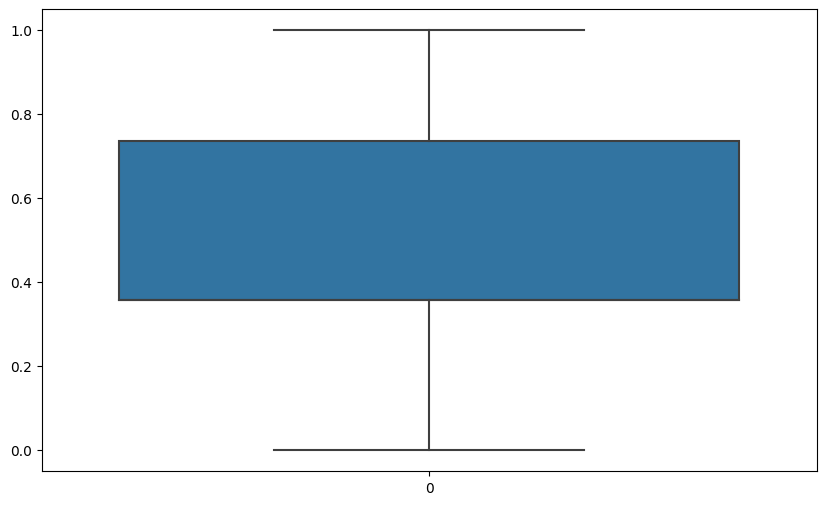

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(finaldata.SkinThickness)

Now from above all box plots we can observe and say that **all outliers are removed** from all columns.

# Splitting data into Independent and Dependent data

In [29]:
X = finaldata.drop('Outcome',axis=1)
y = finaldata['Outcome']

In [30]:
X.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


# Splitting data into training dataset and test dataset

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [32]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((614, 5), (614,), (154, 5), (154,))

# Algortihms Building

# 1. Logistic Regression

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)
lg = logreg_cv.predict(X_test)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.7670015864621893


**Evaluation of Metrics**

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       107
         1.0       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154


 F1:
 0.627906976744186

 Precision score is:
 0.6923076923076923

 Recall score is:
 0.574468085106383

 Confusion Matrix:



<Axes: >

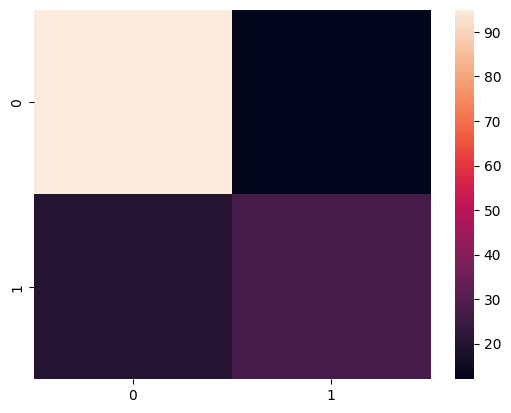

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
print("Classification Report is:\n",classification_report(y_test,lg))
print("\n F1:\n",f1_score(y_test,lg))
print("\n Precision score is:\n",precision_score(y_test,lg))
print("\n Recall score is:\n",recall_score(y_test,lg))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,lg))

# 2. KNN (K-Nearest Neighbours)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
# fitting the model for grid search
grid.fit(X_train, y_train)
knn_predict = grid.predict(X_test)
print(grid.best_params_)
print(grid.best_score_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 27}
0.7588048651507139


**Evaluation of Metrics**

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       107
         1.0       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154


 F1:
 0.627906976744186

 Precision score is:
 0.6923076923076923

 Recall score is:
 0.574468085106383

 Confusion Matrix:



<Axes: >

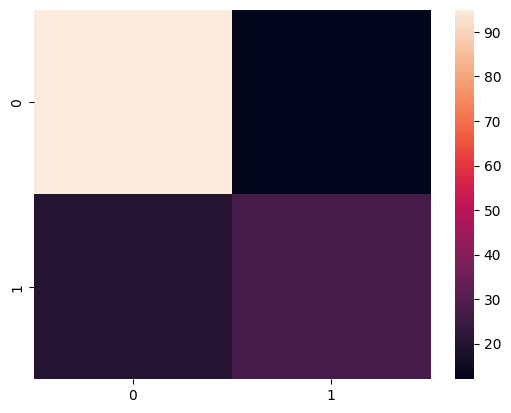

In [36]:
print("Classification Report is:\n",classification_report(y_test,knn_predict))
print("\n F1:\n",f1_score(y_test,knn_predict))
print("\n Precision score is:\n",precision_score(y_test,knn_predict))
print("\n Recall score is:\n",recall_score(y_test,knn_predict))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_predict))

# 3. Decision Tree

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=dtc,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train,y_train)
dtc_predict = grid_search.predict(X_test)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


Classification Report is:
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       107
         1.0       0.78      0.45      0.57        47

    accuracy                           0.79       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154


 F1:
 0.5675675675675675

 Precision score is:
 0.7777777777777778

 Recall score is:
 0.44680851063829785

 Confusion Matrix:



<Axes: >

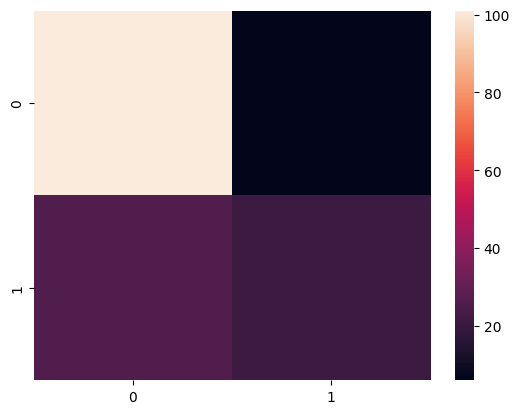

In [38]:
print("Classification Report is:\n",classification_report(y_test,dtc_predict))
print("\n F1:\n",f1_score(y_test,dtc_predict))
print("\n Precision score is:\n",precision_score(y_test,dtc_predict))
print("\n Recall score is:\n",recall_score(y_test,dtc_predict))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dtc_predict))

# 4. Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
rf_predict = CV_rfc.predict(X_test)
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 500}
0.7655337864854058


Classification Report is:
               precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       107
         1.0       0.71      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154


 F1:
 0.6741573033707866

 Precision score is:
 0.7142857142857143

 Recall score is:
 0.6382978723404256

 Confusion Matrix:



<Axes: >

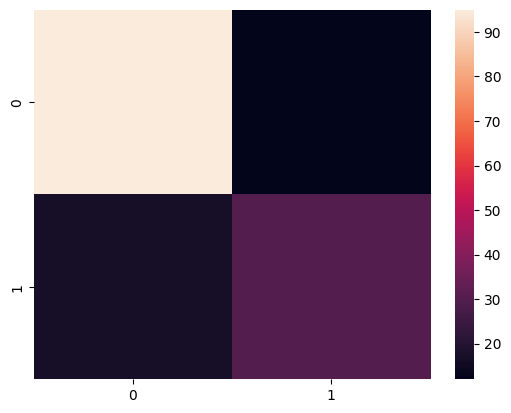

In [40]:
print("Classification Report is:\n",classification_report(y_test,rf_predict))
print("\n F1:\n",f1_score(y_test,rf_predict))
print("\n Precision score is:\n",precision_score(y_test,rf_predict))
print("\n Recall score is:\n",recall_score(y_test,rf_predict))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,rf_predict))

# 5. Support Vector Machine

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
model =  SVC()
param_grid = {'C': [0.1,0.01, 1.0, 10,50, 100, 1000],
              'gamma': ['scale'],
              'kernel': ['rbf','poly','sigmoid']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
# fitting the model for grid search
grid.fit(X_train, y_train)
svm_predict = grid.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       107
         1.0       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154


 F1:
 0.5999999999999999

 Precision score is:
 0.7272727272727273

 Recall score is:
 0.5106382978723404

 Confusion Matrix:



<Axes: >

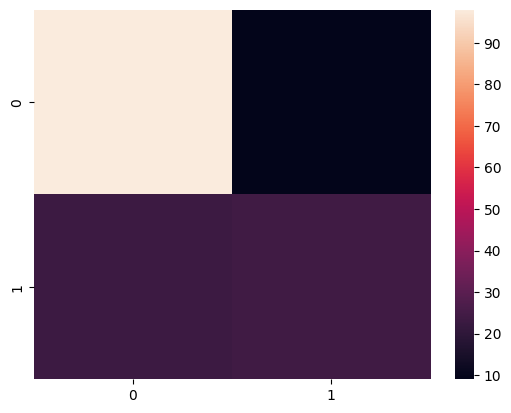

In [43]:
print("Classification Report is:\n",classification_report(y_test,svm_predict))
print("\n F1:\n",f1_score(y_test,svm_predict))
print("\n Precision score is:\n",precision_score(y_test,svm_predict))
print("\n Recall score is:\n",recall_score(y_test,svm_predict))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_predict))

# 6. Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
nb_predict = nbModel_grid.predict(X_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


Classification Report is:
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       107
         1.0       0.64      0.53      0.58        47

    accuracy                           0.77       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154


 F1:
 0.5813953488372093

 Precision score is:
 0.6410256410256411

 Recall score is:
 0.5319148936170213

 Confusion Matrix:



<Axes: >

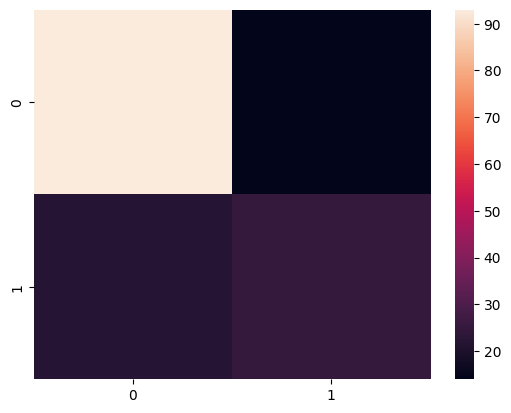

In [45]:
print("Classification Report is:\n",classification_report(y_test,nb_predict))
print("\n F1:\n",f1_score(y_test,nb_predict))
print("\n Precision score is:\n",precision_score(y_test,nb_predict))
print("\n Recall score is:\n",recall_score(y_test,nb_predict))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_predict))

In [48]:
input_data = (5,166,19,25.8,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



prediction = CV_rfc.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1.]
The person is diabetic


# Saving the trained model

In [49]:
import pickle

In [56]:
filename = '/content/gdrive/MyDrive/MultipleDiseasePrediction/savedmodels/diabetes_model.sav'
pickle.dump(CV_rfc, open(filename, 'wb'))

In [57]:
# loading the saved model
loaded_model = pickle.load(open('/content/gdrive/MyDrive/MultipleDiseasePrediction/savedmodels/diabetes_model.sav', 'rb'))

In [58]:
input_data = (5,166,19,25.8,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



prediction = CV_rfc.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1.]
The person is diabetic


In [54]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
SkinThickness
BMI
Age
